In [38]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import scale
import sklearn as sk

In [39]:
a=pd.read_csv('E:\Data Science - Yogesh\KNN\Data.csv') # Reading File

In [40]:
a.head() # Shows first 5 records in data set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [41]:
a.shape # Shows number of rows and columns present

(569, 32)

In [42]:
a.isnull().sum() # Checking for Null values

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [43]:
x=a.loc[:,['radius_mean','area_mean','smoothness_mean']] # Selecting Required Input columns from the data set and storing in X

In [44]:
y=a.loc[:,'diagnosis'] # Selecting Required Output columns from data set and storing in y

In [45]:
x.head() # shows first 5 records in X data set

,radius_mean,area_mean,smoothness_mean
0,12.32,464.1,0.10280
1,10.60,346.4,0.09688
2,11.04,373.2,0.10770
3,11.28,384.8,0.11640
4,15.19,711.8,0.07963


In [46]:
x=scale(x) # scaling the X data set

In [47]:
type(x) # Shows type of the data set

numpy.ndarray

In [48]:
x # shows Data set

array([[-0.51329651, -0.54262379,  0.45828543],
       [-1.00180093, -0.87737467,  0.03698602],
       [-0.87683468, -0.80115272,  0.8069961 ],
       ...,
       [ 0.32738551,  0.15844751, -0.41206792],
       [ 0.11437486, -0.03040091,  0.96356007],
       [ 2.05703196,  2.07935441,  0.26613874]])

In [49]:
x=pd.DataFrame(x) # converting to Data Frame

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # splitting data

In [51]:
x_test.shape # Gives number of rows and columns in input test data set

(171, 3)

In [52]:
y_test.shape # Gives number of rows and columns in output test data set

(171,)

In [53]:
x_train.shape # Gives number of rows and columns in input train data set

(398, 3)

In [54]:
y_train.shape # Gives number of rows and columns in output train data set

(398,)

In [61]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

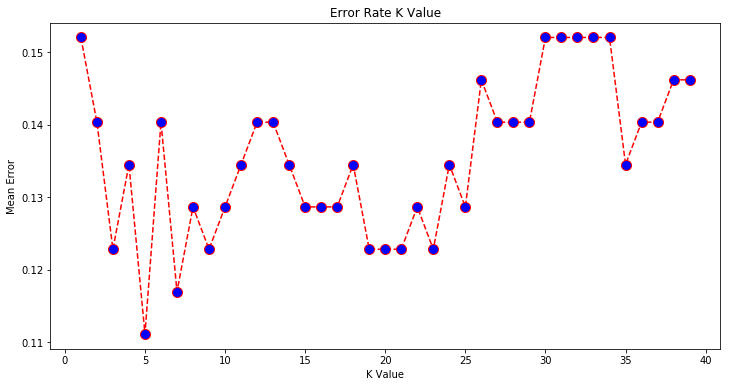

In [62]:
# Plotting sum of errors
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [128]:
knnmodel=KNeighborsClassifier(n_neighbors=17,metric='euclidean')

In [129]:
knnmodel.fit(x_train,y_train) # Fitting model on Training Data sets

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [130]:
y_predict=knnmodel.predict(x_test) # Predicting Output on input testing data

In [131]:
y_predict # Shows Predicted Value

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B'], dtype=object)

In [132]:
np.mean(y_predict==y_test) # Checking Accurcay

0.8713450292397661

In [133]:
accuracy_score(y_test,y_predict) # Checking Accurcay

0.8713450292397661

In [134]:
 confusion_matrix(y_test,y_predict) # Shows Confusion matrix i.e for accuracy only

array([[101,   4],
       [ 18,  48]], dtype=int64)